In [2]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

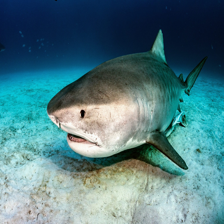

In [13]:
gold_fish = Image.open("Tiger-sharks-scaled.jpg").resize(IMAGE_SHAPE)
gold_fish

In [14]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [15]:
gold_fish[np.newaxis, ...]

array([[[[0.02352941, 0.14117647, 0.34509804],
         [0.01960784, 0.14509804, 0.34509804],
         [0.01960784, 0.14509804, 0.34117647],
         ...,
         [0.01568627, 0.09019608, 0.21568627],
         [0.01568627, 0.09019608, 0.21176471],
         [0.01568627, 0.09803922, 0.21176471]],

        [[0.01960784, 0.1372549 , 0.34117647],
         [0.01960784, 0.14117647, 0.3372549 ],
         [0.02352941, 0.14117647, 0.33333333],
         ...,
         [0.01176471, 0.09019608, 0.21568627],
         [0.01568627, 0.08627451, 0.21176471],
         [0.01960784, 0.09019608, 0.20784314]],

        [[0.01960784, 0.13333333, 0.33333333],
         [0.01960784, 0.13333333, 0.3254902 ],
         [0.02745098, 0.13333333, 0.3254902 ],
         ...,
         [0.01960784, 0.09019608, 0.21176471],
         [0.01960784, 0.08627451, 0.20392157],
         [0.01960784, 0.08627451, 0.2       ]],

        ...,

        [[0.79215686, 0.81568627, 0.83137255],
         [0.77647059, 0.8       , 0.81176471]

In [16]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 0s 195ms/step


(1, 1001)

In [17]:
predicted_label_index = np.argmax(result)
predicted_label_index

4

In [18]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [19]:
image_labels[predicted_label_index]

'tiger shark'